In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv


In [2]:
df = pd.read_csv("result_nuttx.csv", header=1, encoding='utf-8')
display(df)

,Unnamed: 0,patacongo@42af7a65-404d-4744-a932-0658087f49c3,gnutt@nuttx.org,jeditekunum@gmail.com,juha.niskanen@haltian.com,acassis@gmail.com,geams31@users.sf.net,macscomp@gmail.com,manuel.stuehn@gmx.net,jussi.kivilinna@haltian.com,...,ivan95.603@hotmail.com,buxiasen@xiaomi.com,jfbblue0922@gmail.com,Takuya.Miyashita@sony.com,Takuya.Miyashita@sony.com.1,hudson@bduncanltd.com,hiccupzhu@gmail.com,gaohedong@xiaomi.com,luppy@appkaki.com.2,nicolas.lemble@gmail.com
0,arch/arm,9.585346,43.429952,0.0,0.032206,0.257649,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,arch/arm/src,9.856408,43.625498,0.0,0.132802,0.539509,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,arch/arm/src/dm320,41.666667,54.166667,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,arch/arm/src/dm320/dm320_decodeirq.c,50.000000,50.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,arch/arm/src/lpc214x,70.000000,30.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,boards/risc-v/esp32h2/esp32h2-devkit/src/esp32...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6368,boards/arm64/imx9,0.000000,0.000000,0.0,0.000000,30.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6369,boards/arm64/imx9/imx93-evk,0.000000,0.000000,0.0,0.000000,30.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6370,boards/arm64/imx9/imx93-evk/src,0.000000,0.000000,0.0,0.000000,30.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Extrair os nomes dos autores, ignorando a primeira coluna
autores = df.columns[1:].tolist()
print(autores)

# Inicializar dicionários para contar arquivos por desenvolvedor e desenvolvedores por arquivo
arquivos_por_responsavel = {autor: 0 for autor in autores}
responsaveis_por_arquivo = {}

# Iterar sobre cada autor
for autor in autores:
    arquivos = []
    for index, row in df.iterrows():
        try:
            ownership = float(row[autor])
        except ValueError:
            ownership = 0.0
        if ownership > 0:  # Se a posse do arquivo for maior que 0%
            arquivo = row['Unnamed: 0']
            arquivos.append(arquivo)
            arquivos_por_responsavel[autor] += 1  # Incrementar contador de arquivos do desenvolvedor
            
            # Incrementar contador de desenvolvedores do arquivo
            if arquivo in responsaveis_por_arquivo:
                responsaveis_por_arquivo[arquivo].add(autor)
            else:
                responsaveis_por_arquivo[arquivo] = {autor}
    
    if arquivos:  # Só imprimir se houver arquivos
        print(f"Arquivos de {autor}: {arquivos}")
    else:
        print(f"Arquivos de {autor}: Nenhum arquivo encontrado")




['patacongo@42af7a65-404d-4744-a932-0658087f49c3', 'gnutt@nuttx.org', 'jeditekunum@gmail.com', 'juha.niskanen@haltian.com', 'acassis@gmail.com', 'geams31@users.sf.net', 'macscomp@gmail.com', 'manuel.stuehn@gmx.net', 'jussi.kivilinna@haltian.com', 'sebastien@lorquet.fr', 'david_s5@usa.net', 'librae8226@gmail.com', 'mouse@yandex-team.ru', 'max.kriegleder@yahoo.com', 'paul-a.patience@polymtl.ca', 'macscomp@gmail.com.1', 'saehie.park@samsung.com', 'ppisa@pikron.com', 'seanshpart@yahoo.com', 'bruherrera@gmail.com', 'Stefan.Kolb@avat.de', 'i.averyanov@geoscan.aero', 'sp@orbitalfox.com', 'pn_bouteville@yahoo.fr', 'pn_bouteville@yahoo.fr.1', 'A1247973@BE1WL756.emea1.cds.t-internal.com', 'A1247973@BE1WL756.emea1.cds.t-internal.com.1', 'admin@192.168.137.99', 'M.Lederhilger@ds-automotion.com', 'frank.benkert@avat.de', 'marten@intuitiveaerial.com', 'a1247973@BE1WL756.emea1.cds.t-internal.com', 'loketep@yahoo.com', 'karim.kdm@gmail.com', 'pettitkd@gmail.com', 'wail.khemir@polymtl.ca', 'slimane.ben

In [13]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values() if count > 0)
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de responsáveis: {total_responsaveis}")

Total de responsáveis: 122


In [12]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values())
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de contribuidores: {total_responsaveis}")

Total de contribuidores: 705


In [5]:
# Caminho do arquivo CSV de saída
output_file = 'contagem_arquivos_por_responsavel_nuttx.csv'

# Escrever contagem de arquivos por responsavel em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Responsável', 'Descrição'])

    for autor, count in arquivos_por_responsavel.items():
        if count == 1:
            writer.writerow([autor, f"{count}"])
        else:
            writer.writerow([autor, f"{count}"])

print(f"Contagem de arquivos por desenvolvedor salva em {output_file}")



Contagem de arquivos por desenvolvedor salva em contagem_arquivos_por_responsavel_nuttx.csv


In [6]:
data = pd.read_csv("contagem_arquivos_por_responsavel_nuttx.csv", encoding='utf-8')
display(data)

,Responsável,Descrição
0,patacongo@42af7a65-404d-4744-a932-0658087f49c3,347
1,gnutt@nuttx.org,3231
2,jeditekunum@gmail.com,0
3,juha.niskanen@haltian.com,10
4,acassis@gmail.com,260
...,...,...
700,hudson@bduncanltd.com,0
701,hiccupzhu@gmail.com,0
702,gaohedong@xiaomi.com,0
703,luppy@appkaki.com.2,0


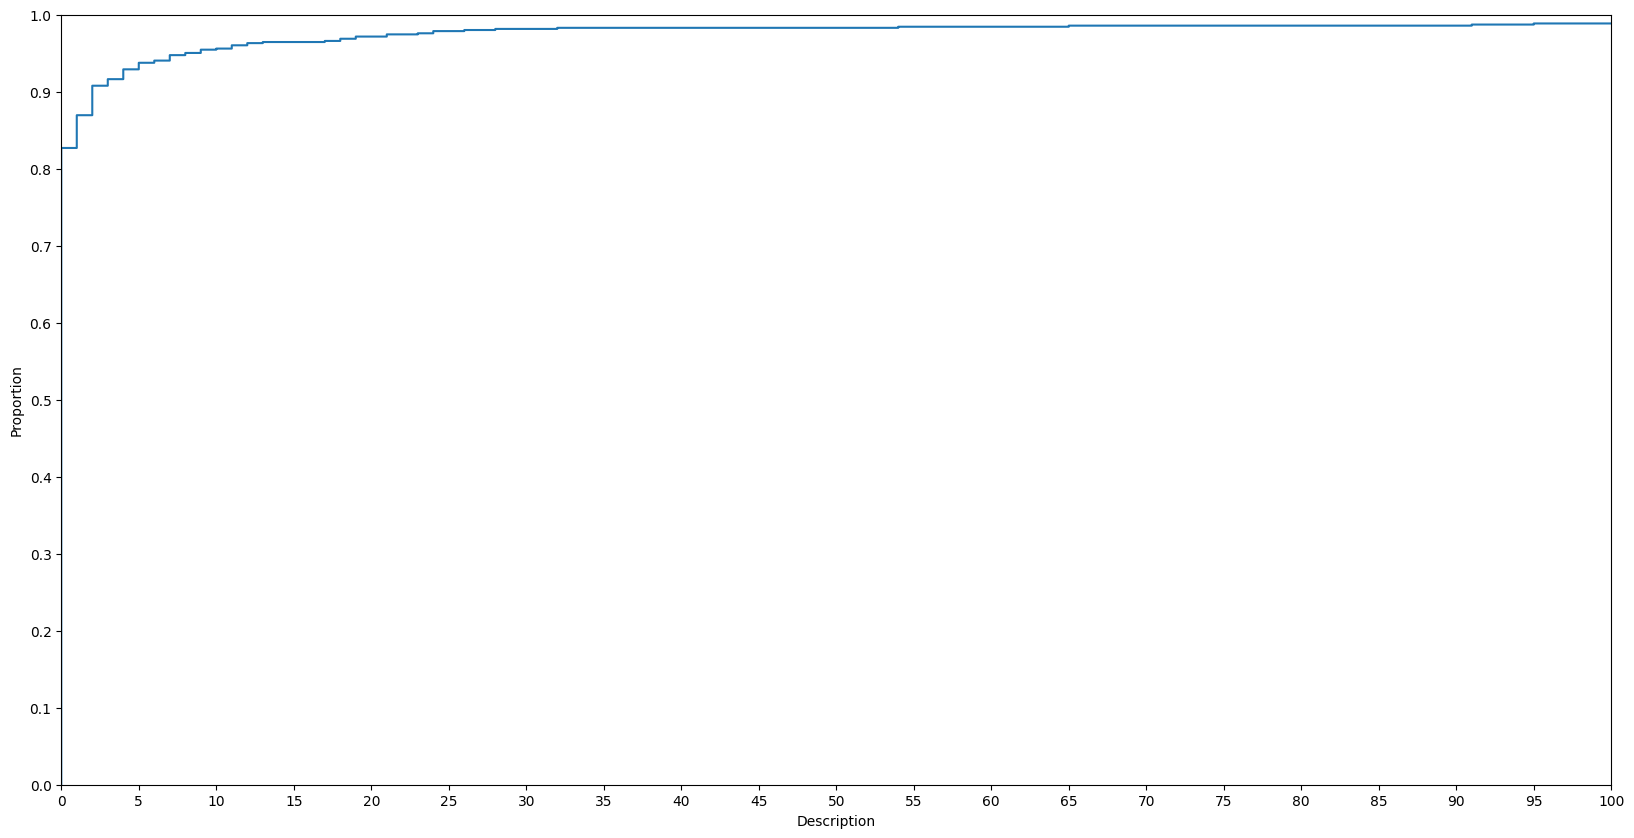

In [7]:
# Converter a coluna "Descrição" para valores numéricos
data['Descrição'] = pd.to_numeric(data['Descrição'], errors='coerce')

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF
sns.ecdfplot(data=data, x='Descrição')


plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Description') # Definir o rótulo do eixo x

# Ajustar a escala do eixo x
plt.xlim(0, 100)  # Ajuste os valores conforme necessário

# Ajustar os ticks do eixo x para que sejam de 5 em 5
plt.xticks(np.arange(0, 101, 5))

# Exibir o gráfico
plt.show()

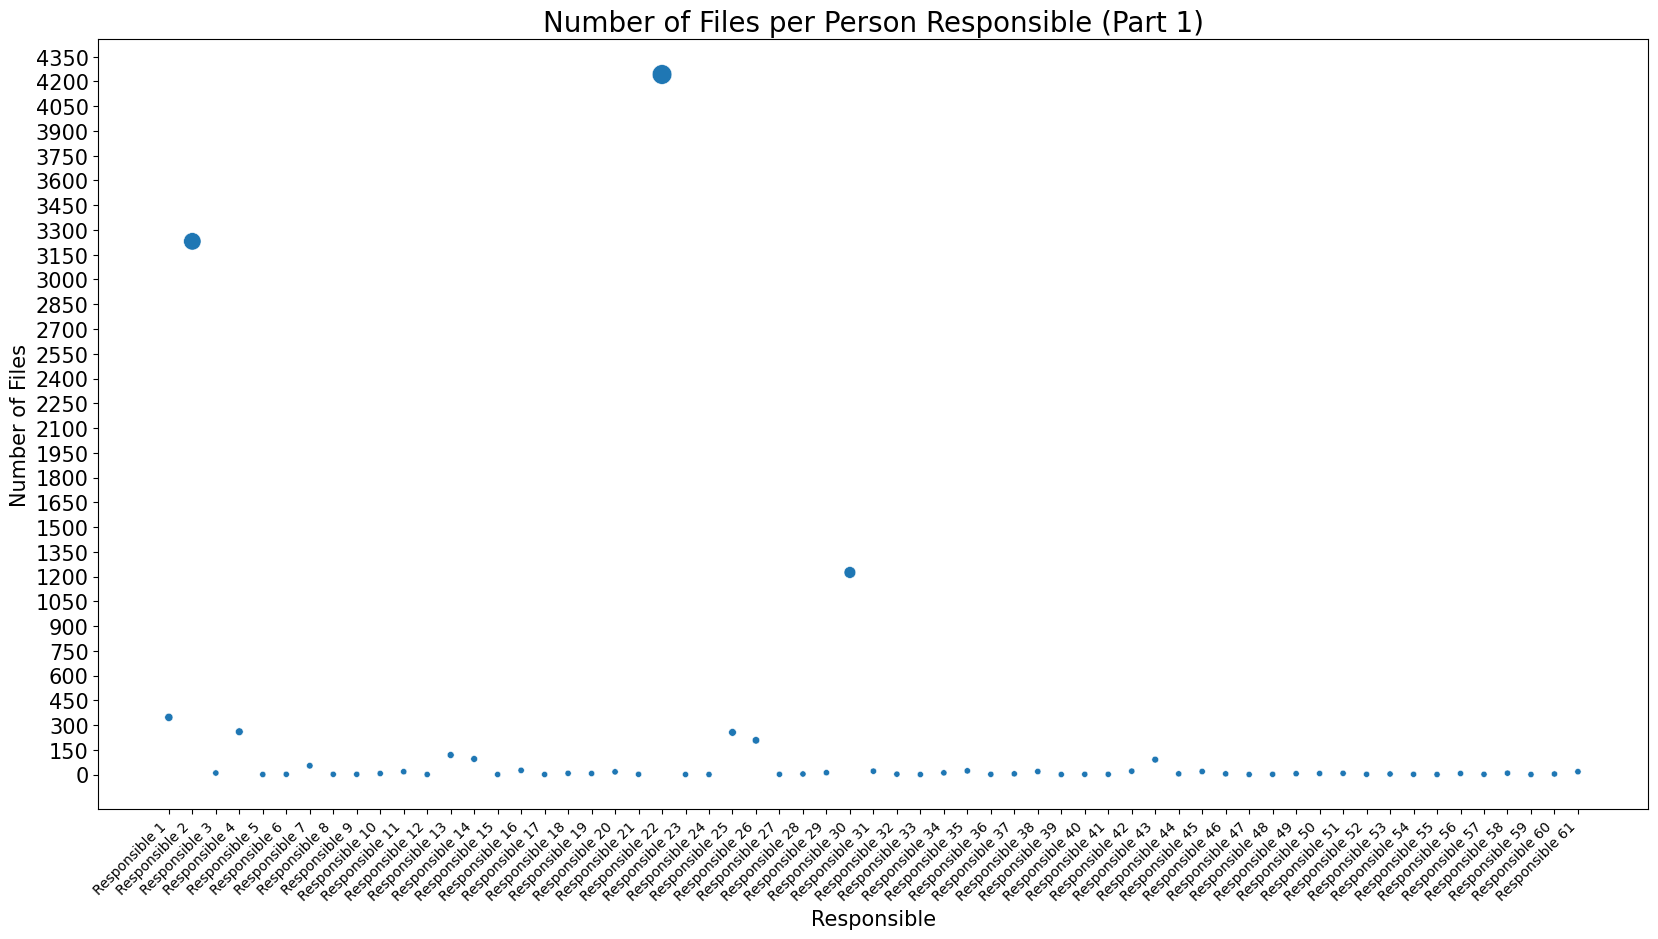

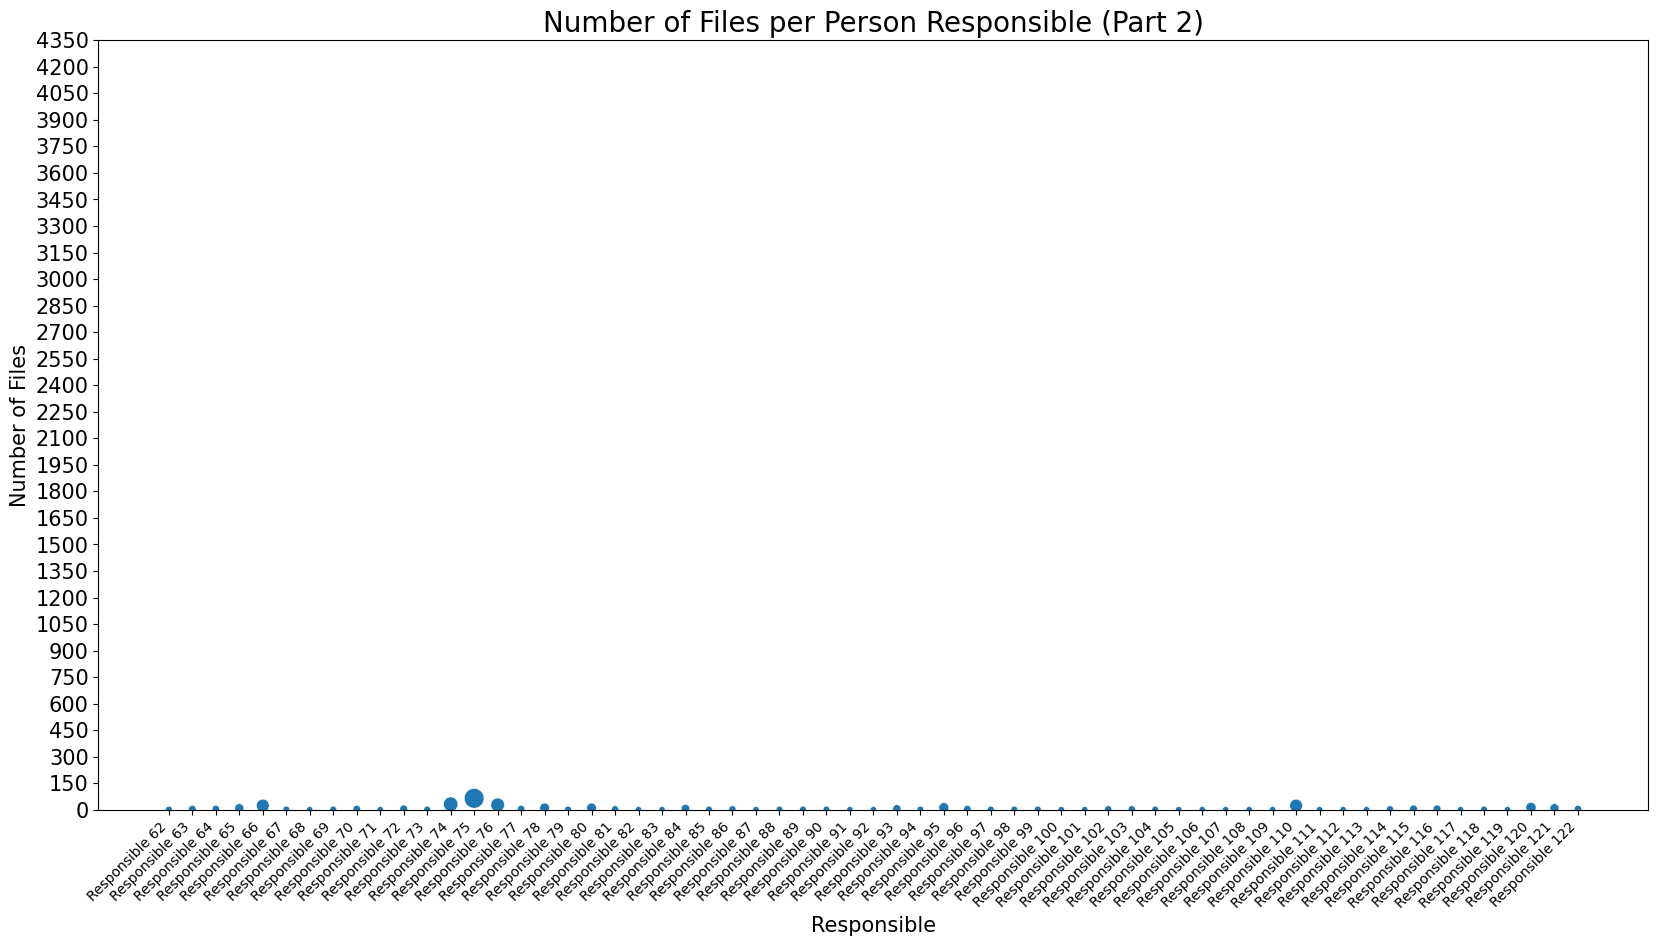

In [8]:

# Filtrar os dados para mostrar apenas aqueles com mais de 0 arquivos
filtered_data = data[data['Descrição'] > 0].copy()

# Substituir e-mails por "Responsável 1", "Responsável 2", etc.
filtered_data['Responsável'] = ['Responsible {}'.format(i+1) for i in range(len(filtered_data))]

# Criar uma coluna "Tamanho" para o tamanho das bolhas
filtered_data['Tamanho'] = filtered_data['Descrição'] * 10  # Ajuste conforme necessário

# Dividir os dados em dois subconjuntos
middle_index = len(filtered_data) // 2
data_part1 = filtered_data.iloc[:middle_index]
data_part2 = filtered_data.iloc[middle_index:]

# Gráfico 1
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part1, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 1)', fontsize=20)
plt.yticks(np.arange(0, 4401, 150), fontsize=15)

# Exibir o primeiro gráfico
plt.show()

# Gráfico 2
plt.figure(figsize=(20, 10))
sns.scatterplot(data=data_part2, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Responsible', fontsize=15)
plt.ylabel('Number of Files', fontsize=15)
plt.title('Number of Files per Person Responsible (Part 2)', fontsize=20)
plt.yticks(np.arange(0, 4401, 150), fontsize=15)

# Exibir o segundo gráfico
plt.show()

In [9]:
# Contar número de responsáveis por arquivo
num_responsaveis_por_arquivo = {arquivo: len(responsaveis) 
                                   for arquivo, responsaveis in responsaveis_por_arquivo.items()}
# Caminho do arquivo CSV de saída
output_file = 'contagem_responsaveis_por_arquivo_nuttx.csv'

# Escrever contagem de desenvolvedores por arquivo em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Arquivo', 'Descrição'])

    for arquivo, count in num_responsaveis_por_arquivo.items():
        if count > 1:
            writer.writerow([arquivo, f"{count} "])
        else:
            writer.writerow([arquivo, f"{count} "])

print(f"Contagem de desenvolvedores por arquivo salva em {output_file}")

Contagem de desenvolvedores por arquivo salva em contagem_responsaveis_por_arquivo_nuttx.csv


In [10]:
data = pd.read_csv("contagem_responsaveis_por_arquivo_nuttx.csv", encoding='utf-8')
display(data)

,Arquivo,Descrição
0,arch/arm,14
1,arch/arm/src,14
2,arch/arm/src/dm320,3
3,arch/arm/src/dm320/dm320_decodeirq.c,2
4,arch/arm/src/lpc214x,2
...,...,...
6044,arch/xtensa/src/esp32s3/esp32s3_libc_stubs.c,1
6045,drivers/wireless/ieee80211/bcm43xxx/bcmf_inter...,1
6046,drivers/sensors/apds9922.c,1
6047,arch/arm/src/gd32f4/gd32f4xx_progmem.c,1


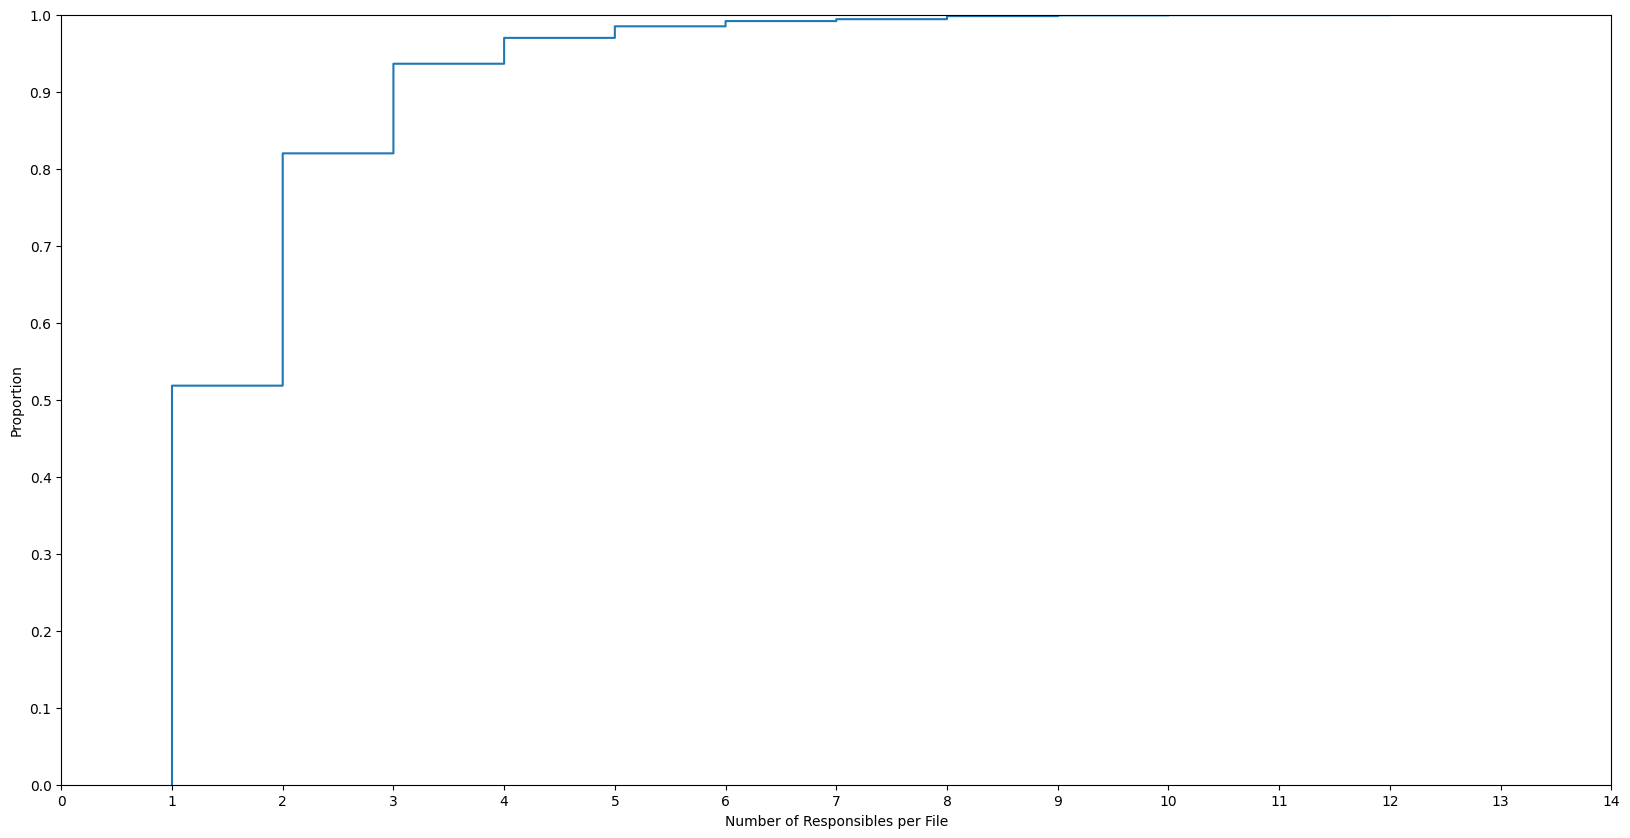

In [11]:
# Converter o dicionário para um DataFrame
data_responsaveis = pd.DataFrame(list(num_responsaveis_por_arquivo.items()), columns=['Arquivo', 'Contagem'])

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF para a contagem de responsáveis por arquivo
sns.ecdfplot(data=data_responsaveis, x='Contagem')

plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Number of Responsibles per File')  # Definir o rótulo do eixo x

# Ajustar a escala do eixo x, se necessário
plt.xlim(0, max(data_responsaveis['Contagem']))  # Ajuste conforme necessário

# Ajustar os ticks do eixo x para intervalos regulares, aqui ajustei para 1 em 1
plt.xticks(np.arange(0, max(data_responsaveis['Contagem'])+1, 1))

# Exibir o gráfico
plt.show()